In [2]:
import pandas as pd

In [6]:
df_seu_data = pd.read_excel('CASSIOPE_data.xlsx', 'SEU')
df_seu_data.head()

,#Time,Latitude (deg),Longitude (deg),Altitude (km),GEO_x (km),GEO_y (km),GEO_z (km),GEO_vx (km/s),GEO_vy (km/s),GEO_vz (km/s)
0,2013-08-10 22:58:00,2.040,-56.112,1257.54,4254.701,-6334.636,270.247,0.060857,0.886850,6.929189
1,2014-11-05 03:30:00,-16.474,168.527,844.33,-6789.204,1377.917,-2036.530,-2.697895,-0.173593,6.874721
2,2014-04-06 14:27:00,-7.965,-42.848,1426.22,5666.930,-5256.495,-1075.552,1.128690,-0.334645,6.707328
3,2014-12-08 01:01:00,6.284,-157.176,1432.37,-7155.956,-3011.543,850.265,-0.477488,-0.758944,-6.742525
4,2014-03-12 03:12:00,-3.417,-53.798,1331.68,4545.641,-6210.352,-457.001,0.355576,0.409626,-6.872163


In [27]:
df_seu_data = df_seu_data.drop(df_seu_data.columns[[1,2,3]], axis=1)

In [30]:
df_seu_data['SEU'] = 1

In [38]:
df_flux = pd.read_excel('flux_data.xlsx')

In [40]:
df_flux = df_flux.drop(df_flux.columns[[2]], axis=1)

In [44]:
df_seu_data.to_excel('CASSIOPE_data_updated.xlsx')

In [45]:
df_non_seu_data = pd.read_excel('CASSIOPE_data_Non-SEU.xlsx')

In [49]:
df_non_seu_data.drop(df_non_seu_data.columns[[0]], axis = 1, inplace = True)

In [ ]:
df_non_seu_data['#Time'] = pd.to_datetime(df_non_seu_data['#Time'])

In [69]:
df_seu_data['#Time'] = pd.to_datetime(df_seu_data['#Time'])

In [88]:
pd.concat([df_non_seu_data, df_seu_data])

,#Time,GEO_x (km),GEO_y (km),GEO_z (km),GEO_vx (km/s),GEO_vy (km/s),GEO_vz (km/s),SEU
0,2013-03-10 03:13:00,-1410.841,-478.882,-7471.466,-2.225029,-6.598689,0.367434,0
1,2013-05-10 20:20:00,-4667.473,-15.599,-5531.316,5.122558,-1.443011,-5.094932,0
2,2013-07-10 18:19:00,-4347.426,-383.702,5085.844,-5.701366,-2.116974,-5.106535,0
3,2013-09-10 06:07:00,-3631.731,-1984.662,5768.614,6.320366,1.483590,3.772502,0
4,2013-11-10 11:53:00,1506.802,-6518.418,1400.869,1.196887,-1.765089,-7.510982,0
...,...,...,...,...,...,...,...,...
17,2019-10-02 14:59:00,1930.811,-6577.208,-2363.665,-0.102797,2.915060,-6.707080,1
18,2019-11-23 09:29:00,5657.277,-4278.863,-2704.329,2.543424,-1.092028,6.393136,1
19,2020-10-01 18:24:00,1073.523,-6599.913,-3679.630,0.243837,3.264461,-6.099565,1
20,2020-01-27 15:24:00,2142.166,-7227.320,-1256.169,0.188524,1.339593,-6.785541,1


In [77]:
df_concat_seu_data = pd.concat([df_non_seu_data, df_seu_data])

In [99]:
df_concat_seu_data = df_concat_seu_data.sort_values(by = 'Time (YYYY-MM-DD HH:MM:SS)')

In [96]:
df_concat_seu_data = df_concat_seu_data.rename(columns = {'#Time': 'Time (YYYY-MM-DD HH:MM:SS)'})

In [101]:
# Machine Learning 

In [103]:
import seaborn as sns

In [112]:
df_concat_no_date = df_concat_seu_data.drop(df_concat_seu_data.columns[[0]], axis = 1)

In [126]:
df_concat_no_date = df_concat_no_date.reset_index()

In [128]:
df_concat_no_date.drop(df_concat_no_date.columns[[0]], axis = 1, inplace = True)

In [158]:
df_concat_seu_data = df_concat_seu_data.reset_index()

In [150]:
df_concat_seu_data.drop(df_concat_seu_data.columns[[0]], axis = 1, inplace = True)

In [173]:
df_concat_seu_data.columns[0]

'index'

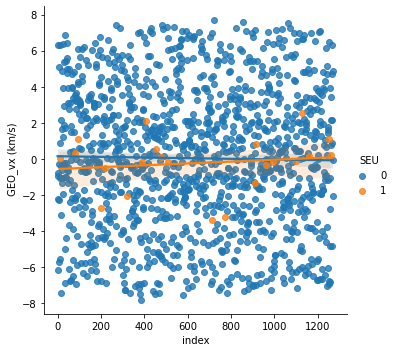

In [175]:
sns.lmplot(data = df_concat_seu_data, x = df_concat_seu_data.columns[0], y = df_concat_seu_data.columns[5], hue = 'SEU')

In [136]:
df_concat_no_date.head()

,GEO_x (km),GEO_y (km),GEO_z (km),GEO_vx (km/s),GEO_vy (km/s),GEO_vz (km/s),SEU
0,-1317.068,-808.622,-7677.011,6.302345,-2.379130,-0.633256,0
1,-787.479,6676.503,-232.167,-0.804404,0.337668,7.877404,0
2,-1410.841,-478.882,-7471.466,-2.225029,-6.598689,0.367434,0
3,-299.224,1483.662,-7582.832,-6.127879,2.857994,1.164522,0
4,223.993,5547.998,-3782.265,-0.932585,4.365888,6.549829,0


In [145]:
# Step 1: Import the necessary libraries
#import numpy as np
#import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 2: Load and preprocess your time series dataset
# Replace 'your_dataset.csv' with the actual file path or data loading method

# Assuming the target variable is in a column called 'target'
X = df_concat_no_date.drop(columns=['SEU'])
y = df_concat_no_date['SEU']

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Step 4: Choose a classification algorithm and create the model
model = RandomForestClassifier(n_estimators=100)

# Step 5: Train the model on the training data
model.fit(X_train, y_train)

# Step 6: Evaluate the model on the testing data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


In [146]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[250,   0],
       [  4,   1]])

In [179]:
df_flux_2004html = pd.read_html('https://www.spaceweather.gc.ca/forecast-prevision/solar-solaire/solarflux/sx-5-flux-en.php?year=2004')

In [186]:
df_flux_2004html = df_flux_2004html[0]

In [188]:
df_flux_2004html.head()

,Date,Time,Julian day,Carringtonrotation,Observed Flux,Adjusted Flux,URSI Flux
0,2004-10-28,17:00:00,2453307.229,2022.605,132.7,130.9,117.8
1,2004-10-28,20:00:00,2453307.354,2022.610,135.8,134.0,120.6
2,2004-10-29,20:00:00,2453308.354,2022.646,130.6,128.8,115.9
3,2004-10-29,23:00:00,2453308.479,2022.651,134.2,132.3,119.1
4,2004-10-30,17:00:00,2453309.229,2022.678,147.9,145.8,131.2


In [ ]:
df_flux

In [1]:
#pd.read_html('https://donnees-data.asc-csa.gc.ca/users/OpenData_DonneesOuvertes/pub/carisma_csv/mag/daily/2004/CONT/')

In [ ]:
#pd.read_html('https://donnees-data.asc-csa.gc.ca/users/OpenData_DonneesOuvertes/pub/carisma_csv/mag/daily/2004/CONT/20040101CONT.MAG.csv

In [ ]:
for file in folder: # iterates through the folders found in each category(each category is the name of a folder in the 'predictEDSS' folder
    
        path = os.path.join(folder, file)
        for FILE in os.listdir(path):
            print(FILE)
            for file in FILE:
                fileData = pd.read_csv(os.path.join(path, FILE))